In [1]:
# 自作モジュールへの変更を自動的にリロードするためのおまじない
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import lib.S2Z as stoz
import lib.Z_model as zmodel
import lib.Useful as usf

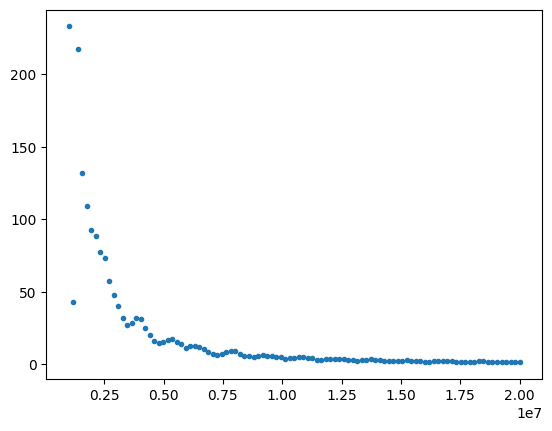

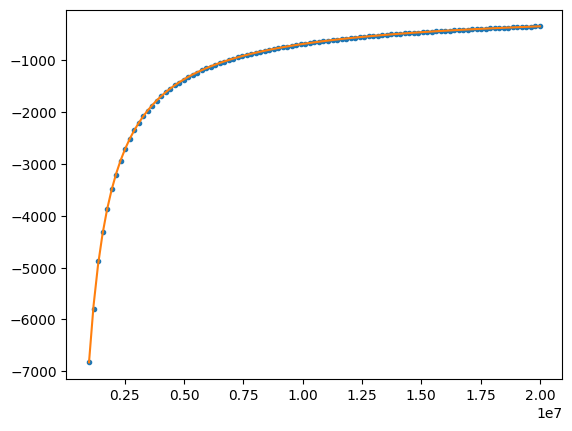

In [2]:
data = np.loadtxt("../data/jigu_open_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.C_ideal_imag,freq,Z.imag,p0=[10e-12])

plt.plot(freq,Z.real,'.')
plt.figure()
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.C_ideal_imag(freq,*popt))
C1 = popt[0]

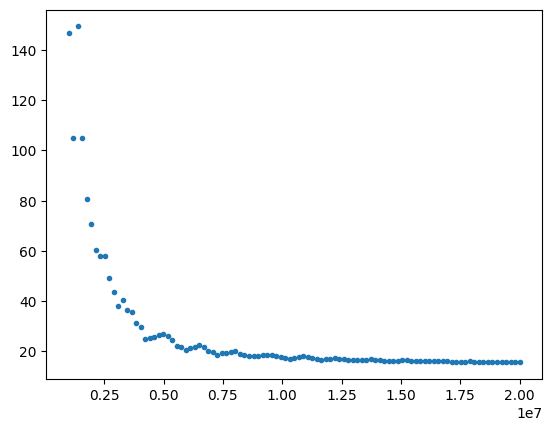

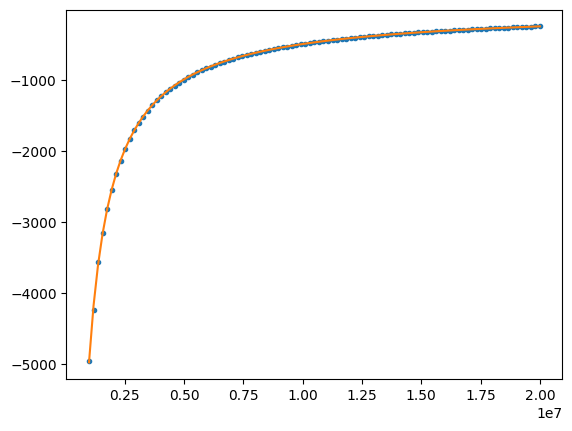

In [3]:
data = np.loadtxt("../data/jigu_resistance_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.C_ideal_imag,freq,Z.imag,p0=[10e-12])
plt.plot(freq,Z.real,'.')
plt.figure()
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.C_ideal_imag(freq,*popt))
C2 = popt[0] - C1

[2.0718867e-11 2.4742907e+02]
[ 2.24289906e-11 -2.37016959e+02]


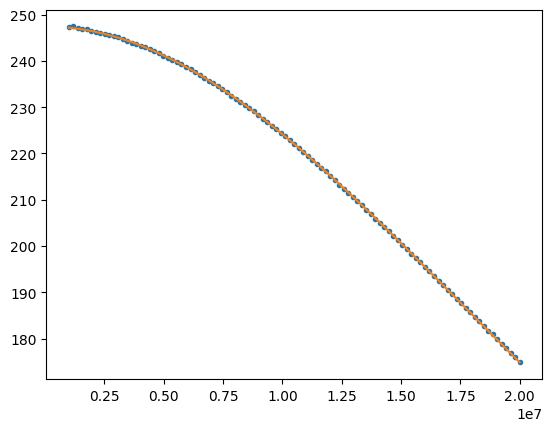

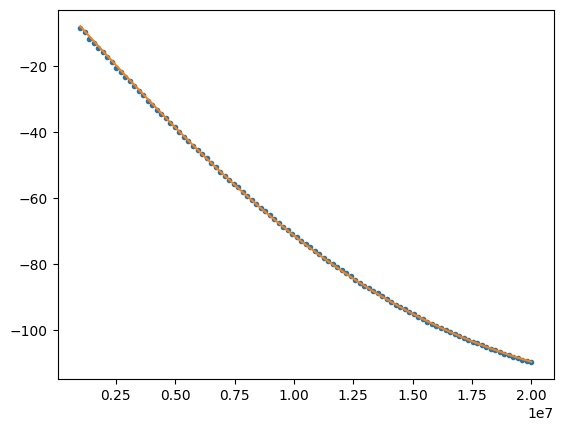

In [4]:
data = np.loadtxt("../data/jigu_res_and_load_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.CR_par_real,freq,Z.real,p0=[10e-12,10])
plt.plot(freq,Z.real,'.')
plt.plot(freq,zmodel.CR_par_real(freq,*popt))
print(popt)
plt.figure()
popt,pcov = curve_fit(zmodel.CR_par_imag,freq,Z.imag,p0=[10e-12,10])
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.CR_par_imag(freq,*popt))
print(popt)

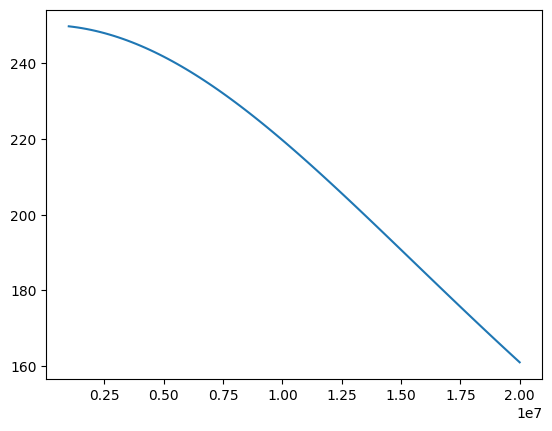

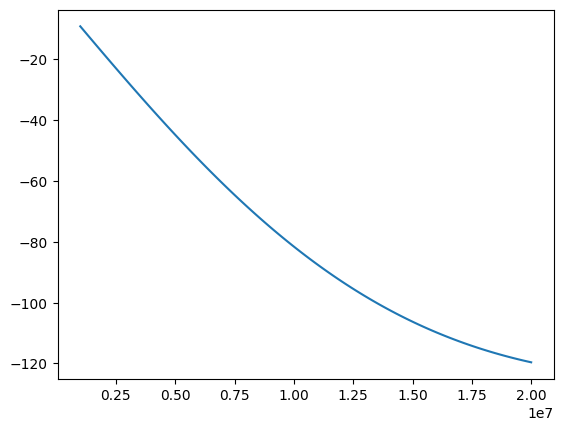

In [5]:
plt.plot(freq,zmodel.JG_R(freq,C1,200,C2,50).real)
plt.figure()
plt.plot(freq,zmodel.JG_R(freq,C1,200,C2,50).imag)

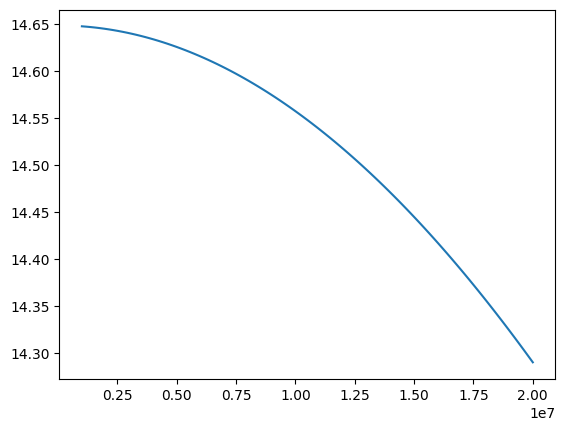

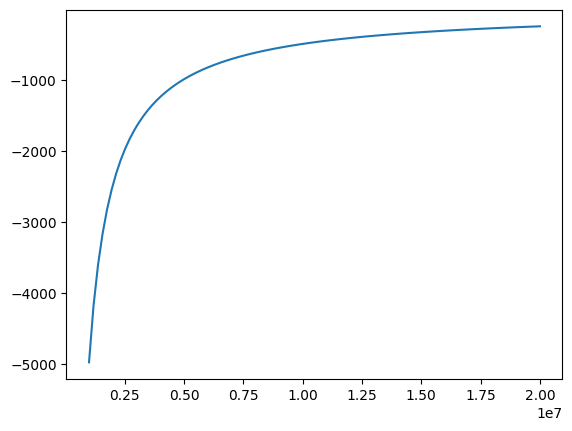

In [6]:
plt.plot(freq,zmodel.JG_R(freq,C1,200,C2,np.inf).real)
plt.figure()
plt.plot(freq,zmodel.JG_R(freq,C1,200,C2,np.inf).imag)

ロードとport1を付け替える

3.2754495799216635e-11


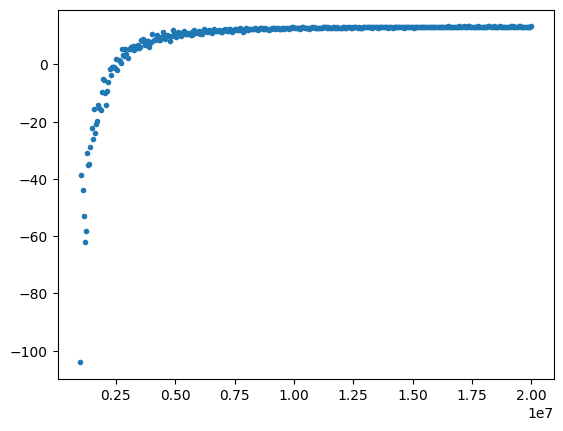

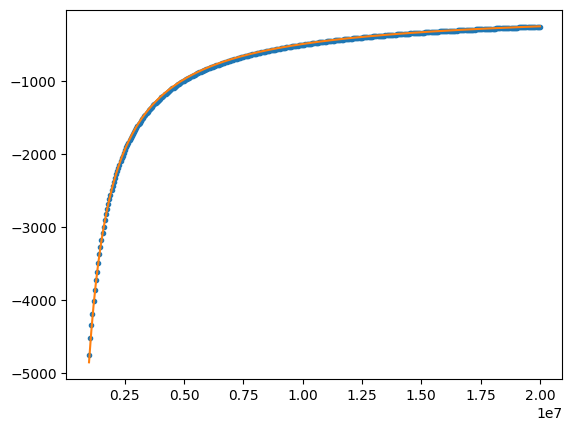

In [8]:
data = np.loadtxt("../data/jigu_res_open_swap_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.C_ideal_imag,freq,Z.imag,p0=[10e-12])

plt.plot(freq,Z.real,'.')
plt.figure()
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.C_ideal_imag(freq,*popt))
C1 = popt[0]
print(C1)

[-2.1356913e-11  2.4785016e+02]
[ 2.39738866e-11 -2.33271450e+02]


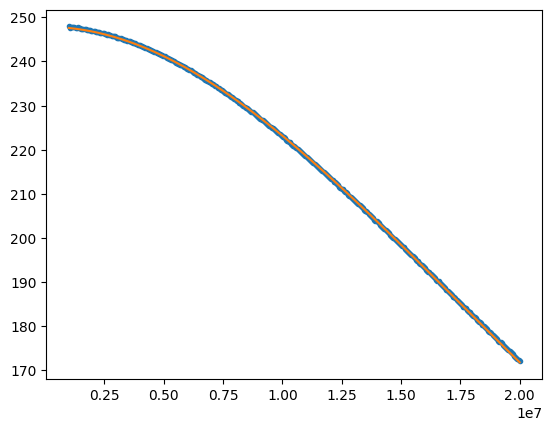

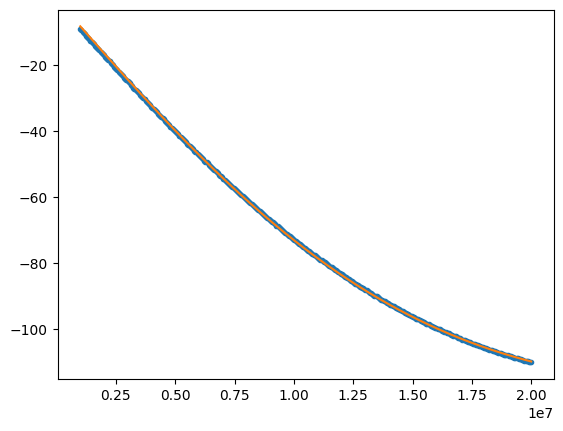

In [10]:
data = np.loadtxt("../data/jigu_res_and_load_swap_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.CR_par_real,freq,Z.real,p0=[10e-12,10])
plt.plot(freq,Z.real,'.')
plt.plot(freq,zmodel.CR_par_real(freq,*popt))
print(popt)
plt.figure()
popt,pcov = curve_fit(zmodel.CR_par_imag,freq,Z.imag,p0=[10e-12,10])
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.CR_par_imag(freq,*popt))
print(popt)